### Formula

Strength of Magnetic Field
$H=\dfrac{I\times N}{L}$

Ampere Force
$F=BIL$

B:Magnetic Induction

I:Current

L:length of coil

Magnetic Induction
$B=\dfrac{\mu _{0}I}{2r}$

Air Drag:
$\left| \overrightarrow{F}_{D}\right| =\dfrac{1}{2}\rho C_{D}Av^{2}$

F = drag force (Newtons)

ρ = density of fluid 

(1.27 [kg/m3] for air)

C = coefficient of drag

A = cross-sectional area

v = relative velocity

### References:  
> Blog [CN_Blog][1]  
> Blog [Blog][2]  
> A PDF document [PDF_file][runoob]  
> Article [Article][3]

  [1]: https://www.cnblogs.com/deciduousmap/p/12207566.html
  [runoob]: https://www.albany.edu/~soktyabr/NNSE508/NNSE508_EM-L2-magnetic_field.pdf
  [2]: https://www.doeeet.com/content/eee-components/passives/inductors-magnetic-induction-magnetic-flux-and-faradays-law/
  [3]: https://www.extrica.com/article/21627

### Coil Gun
>The cannon is composed of two parts: a fixed coil and a projectile coil. The electromagnetic force is generated by the mutual inductance gradient of the coaxial coil. The fixed coil acts as the barrel of the cannon, and if a strong magnetic field is generated by the passage of current, an induced current is formed in the projectile coil at the same time, so that the cannonball can be launched at a high speed by the electromagnetic force generated between the magnetic field and the induced current. The basic principle is that a charged conductor or magnetic object is propelled forward by electromagnetic force in a magnetic field. The diagram below.

![shell](markdown_img\model.jpg)
>Though in this project I only simulate for one unit of coil

### Magnetic Induction
>Magnetic field induction inside a
solenoid is determined by a number of
turns per length n and current I (no
core):  
$ \oint \overrightarrow{B}\cdot dl=\mu _{0}I$  
Shortened as  
$ B=\mu _{0}nI$  
Assume the potential difference in the circuit is stable...

### Ampere Force
>Ampere’s law of force is the “law of
action” between current carrying circuits
through magnetic field.  
Assume the magnetic filed is uniform...  
$ F=BIL$  
![img](markdown_img\Amperes.png)

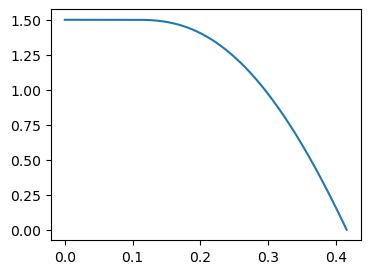

Time: 2.340999999999853s


In [29]:
from re import X
import numpy as np

class Object:
    def __init__(self):
        self.mass = 10 #kg
        self.density = 7874 #kg/m^3
        self.volume = self.mass/self.density #volume of ball
        self.r = (0.75*self.volume*(1/3.14))**(1/3) #radius of ball
        self.velocity = 0 #m/s
        self.acc = 0 #m/s^2
        self.x = 0 #m
        self.y = 1.5 #m
        self.dt = 0.01 #s
    
    def update_object(self,mass=1,volume=1):
        self.mass = mass
        self.volume = volume
        self.density = self.mass / self.volume
        
    def update_acc(self,ampere_force,mass):
        self.acc = ampere_force / self.mass
    
    def get_surface(self):
        return 4*3.14*(self.r**2)
    
    def get_acc(self):
        return self.acc
    
    def update_velocity(self,acc):
        self.velocity += self.acc * self.dt
    
    def get_velocity(self):
        return self.velocity
    
    def update_x_pos(self,velocity):
        self.x += velocity * self.dt
    
    
    def update_x(self,x,velocity):
        self.x = self.x + (velocity * self.dt)
        
    def get_x(self):
        return self.x
    
    def update_y(self,y,time,g=9.81,):
        self.y -= self.y + 0.5*(g * (time**2))
    
    def get_y(self):
        return self.y
        
        
class Coil:
    def __init__(self):
        self.turn = 200
        self.length = 0.1 #m
        self.ampere = 5000 #A #Current #1000-50000
        self.radius = 1 #m
    def modify_coil(self,turn=100,length=1,radius=1):
        self.turn = turn
        self.length = length
        self.radius = radius
    
    def get_turns(self):
        return self.turn
    
    def get_ampere(self):
        return self.ampere
    
    def get_length(self):
        return self.length
    
    def get_turns(self):
        return self.turn
    
    def get_radius(self):
        return self.radius


class simulation:
    def __init__(self):
        self.mu = 4 * np.pi * 10**-7 #H/m
        self.dt = 0.001 #s
        self.air_density = 1.225 #kg/m^3
    def update_current(self, ampere=1):
        self.ampere = ampere
    
    def get_magnetic_induction(self,ampere,radius):
        # self.B = (self.mu * ampere) / (2 * np.pi * radius)
        self.B = self.mu * (self.length / self.turn) * self.ampere
        return self.B
    
    def get_ampere_force(self,B,ampere,length):
        self.ampere_force = self.B * ampere * length
        return self.ampere_force
    
    def gravity_force(self,mass):
        self.g = 9.8 #m/s^2
        return mass * self.g
    
    def air_drag(self,velocity,area):
        self.air_drag = 0.5 * self.air_density * (velocity**2) * area
        return self.air_drag
  
def run():
    sim = simulation()
    coil = Coil()
    object = Object()
    
    #DATA COLLECTION
    posi = []
    X_DATA = []
    Y_DATA = [] 
    MI_DATA = []
    AF_DATA = []
    VEL_DATA = []
    ACC_DATA = []
    time = 0
    
    pos = object.get_x()
    vel = object.get_velocity()
    acc = object.get_acc()
    
    turns = coil.get_turns()
    length = coil.get_length()
    ampere = coil.get_ampere()
    radius = coil.get_radius()
    
    while pos < length:
        x = object.get_x()
        y = object.get_y()
        posi.append(pos)
        ACC_DATA.append(acc)
        VEL_DATA.append(vel)
        X_DATA.append(pos)
        Y_DATA.append(object.get_y())
        
        MI = sim.get_magnetic_induction(ampere,radius)
        AF = sim.get_ampere_force(MI,ampere,length)
        
        object.update_acc(AF,object.mass)
        acc = object.get_acc()
        object.update_velocity(acc)
        vel = object.get_velocity()
        object.update_x_pos(vel)
        pos = object.get_x()
        time += sim.dt
    
    time_t = 0
    gAcc = 0
    hAcc = ACC_DATA[-1]
    XPosition = X_DATA[-1]
    xVelocity = object.get_velocity()
    gVelocity = 0
    height = object.get_y()
    while height > 0:
        area = object.get_surface()
        dragForce_v = object.density * sim.air_density * 0.5 * 0.001 * (gVelocity**2)
        gravity = object.mass * 0.981
        gAcc += ((gravity-dragForce_v) / object.mass) * sim.dt
        #Cal the horizontal drag force
        dragForce = object.density * sim.air_density * 0.5 * 0.001 * (xVelocity**2)
        hAcc -= (dragForce / object.mass) * sim.dt
        #Update velocity and position
        gVelocity = gVelocity + gAcc * 0.001
        height = height - gVelocity * 0.001
        Y_DATA.append(height)
        #Store data to list
        xVelocity = xVelocity + hAcc * 0.001
        XPosition = XPosition + xVelocity * 0.001
        X_DATA.append(XPosition)
        time += 0.001

    
    x = np.arange(0,time-sim.dt,sim.dt)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(4,3))
    plt.plot(X_DATA,Y_DATA)
    plt.show()
    print(f"Time: {time}s")
run()

In [ ]:
import pygame

#button class
class Button():
	def __init__(self, x, y, image, scale):
		width = image.get_width()
		height = image.get_height()
		self.image = pygame.transform.scale(image, (int(width * scale), int(height * scale)))
		self.rect = self.image.get_rect()
		self.rect.topleft = (x, y)
		self.clicked = False

	def draw(self, surface):
		action = False
		#get mouse position
		pos = pygame.mouse.get_pos()

		#check mouseover and clicked conditions
		if self.rect.collidepoint(pos):
			if pygame.mouse.get_pressed()[0] == 1 and self.clicked == False:
				self.clicked = True
				action = True

		if pygame.mouse.get_pressed()[0] == 0:
			self.clicked = False

		#draw button on screen
		surface.blit(self.image, (self.rect.x, self.rect.y))

		return action

In [ ]:
from re import X
import pygame
import get_data
import button

pygame.init()

#create game window
SCREEN_WIDTH = 1000
SCREEN_HEIGHT = 700

screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("Main Menu")

#game variables
game_paused = False
menu_state = "main"

#define fonts
font = pygame.font.SysFont("arialblack", 40)
small_font = pygame.font.SysFont("arialblack", 20)
#define colours
TEXT_COL = (255, 255, 255)

#load button images
resume_img = pygame.image.load("images/button_resume.png").convert_alpha()
options_img = pygame.image.load("images/button_options.png").convert_alpha()
quit_img = pygame.image.load("images/button_quit.png").convert_alpha()
keys_img = pygame.image.load('images/button_keys.png').convert_alpha()
back_img = pygame.image.load('images/button_back.png').convert_alpha()
coil_img = pygame.image.load('images/coilgun.jpeg')
ball_img = pygame.image.load('images/ball.jpg').convert_alpha()

#Test get image size
a = quit_img.get_width()
print(a)

coil_img = pygame.transform.scale(coil_img, (100,100))
ball_img = pygame.transform.scale(ball_img, (25,25))
#create button instances
resume_button = button.Button(SCREEN_WIDTH/2 - (resume_img.get_width()/2), 125, resume_img, 1)
options_button = button.Button(SCREEN_WIDTH/2 - (options_img.get_width()/2), 250, options_img, 1)
quit_button = button.Button(SCREEN_WIDTH/2 - (quit_img.get_width()/2), 375, quit_img, 1)
keys_button = button.Button(400, 325, keys_img, 1)
back_button = button.Button(400, 450, back_img, 1)

def pointInRectanlge(px, py, rw, rh, rx, ry):
    if px > rx and px < rx  + rw:
        if py > ry and py < ry + rh:
            return True
    return False

#Blueprint to make sliders in the game
class Slider:
    def __init__(self, position:tuple, upperValue:int=50000, sliderWidth:int = 30, text:str="Editing features for simulation",
                 outlineSize:tuple=(300, 100))->None:
        self.position = position
        self.outlineSize = outlineSize
        self.text = text
        self.sliderWidth = sliderWidth
        self.upperValue = upperValue
        
    #returns the current value of the slider
    def getValue(self)->float:
        return 5000 + self.sliderWidth / (self.outlineSize[0] / self.upperValue)

    #renders slider and the text showing the value of the slider
    def render(self, display:pygame.display)->None:
        #draw outline and slider rectangles
        pygame.draw.rect(display, (0, 0, 0), (self.position[0], self.position[1], 
                                              self.outlineSize[0], self.outlineSize[1]), 3)
        
        pygame.draw.rect(display, (0, 0, 0), (self.position[0], self.position[1], 
                                              self.sliderWidth, self.outlineSize[1] - 10))

        #determite size of font
        self.font = pygame.font.Font(pygame.font.get_default_font(), int((15/100)*self.outlineSize[1]))

        #create text surface with value
        valueSurf = self.font.render(f"{self.text}: {round(self.getValue())}", True, (255, 0, 0))
        
        #centre text
        # textx = self.position[0] + (self.outlineSize[0]/2) - (valueSurf.get_rect().width/2)
        # texty = self.position[1] + (self.outlineSize[1]/2) - (valueSurf.get_rect().height/2)

        textx = 600
        texty = 400
        
        display.blit(valueSurf, (textx, texty))

    #allows users to change value of the slider by dragging it.
    def changeValue(self)->None:
        #If mouse is pressed and mouse is inside the slider
        mousePos = pygame.mouse.get_pos()
        if pointInRectanlge(mousePos[0], mousePos[1]
                            , self.outlineSize[0], self.outlineSize[1], self.position[0], self.position[1]):
            if pygame.mouse.get_pressed()[0]:
                #the size of the slider
                self.sliderWidth = mousePos[0] - self.position[0]

                #limit the size of the slider
                print(self.sliderWidth)
                # if self.sliderWidth == 0:
                #     self.sliderWidth = 5000
                if self.sliderWidth <= 1:
                    self.sliderWidth =0
                if self.sliderWidth > self.outlineSize[0]:
                    self.sliderWidth = self.outlineSize[0]

def slider_scene():
  draw_text("Slider Scene", font, (0,0,0), 400, 50)
  draw_text("Press 'c' to comfirm your value", small_font, (0,0,0), 400, 100)
  pygame.display.update()
  not_selected = True
  slider = Slider((600, 350))
  while not_selected:
    pygame.event.get()
    screen.fill((255, 255, 255))
    slider.render(screen)
    slider.changeValue()
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_c:
                not_selected = False
                break
    #print(slider.getValue())
    pygame.display.update()
  return slider.getValue()

def draw_text(text, font, text_col, x, y):
  img = font.render(text, True, text_col)
  screen.blit(img, (x, y))

def coilgun(x,y):
  screen.blit(coil_img,(x,y))

def quitgame():
    pygame.quit()
    quit()

def draw_ball(x,y):
  screen.blit(ball_img, (x,y))

def first_scene(new_ampere=None):
  temp = new_ampere
  temp = "Ampere: " + str(temp)
  draw_text("COILGUN", font, TEXT_COL, 100, 25)
  draw_text("Press f to simulate", small_font, TEXT_COL, 150, 600)
  draw_text(temp, small_font, TEXT_COL, 150, 550)
  draw_text("Press q to quit", small_font, TEXT_COL, 150, 650)
  screen.blit(coil_img, (100,150))
  
    #event handler
  simu_start = False
  quit_game = False
  for event in pygame.event.get():
    print(event)
    if event.type == pygame.KEYDOWN:
      if event.key == pygame.K_f:
        simu_start = True
        print("f pressed")
      if event.key == pygame.K_q:
          quit_game = True
          print("game quit")
  if quit_game:
        quitgame()
  if simu_start == True:
    print("simu start")
    if new_ampere == None:
        data = get_data.run()
    else:
        data = get_data.run(new_ampere)
    x_data = data[0]
    x_data = [i*100 + 200 for i in x_data]
    y_data = data[1]
    y_data = [i*100 + 50 for i in y_data]
    temp_x = 0
    temp_y = 0
    x_d = x_data[-1] - 200
    y_d = y_data[-1] - 50
    x_st = "x: " + str(round(x_d)) + "m"
    y_st = "y: " + str(round(y_d)) + "m"
    draw_text(x_st, small_font, TEXT_COL, 600, 600)
    draw_text(y_st, small_font, TEXT_COL, 600, 650)
    pygame.display.update()
    for i in range(0,len(x_data)):
      temp_x = x_data[i]
      temp_y = 398.41 - y_data[i]
      print(temp_x, temp_y)
      screen.blit(ball_img, (temp_x,temp_y))
      pygame.display.update()
      if i == len(x_data)-1:
        break

#game loop
game_start = False
run = True
timess = 0
while run:

  screen.fill((52, 78, 91))

  #check if game is paused
  if game_start == True:
    #check menu state
    if menu_state == "main":
      #draw pause screen buttons
      draw_text("To see tutorial select option", small_font, TEXT_COL, 100, 600)
      if resume_button.draw(screen):
        menu_state = "scene"
      if options_button.draw(screen):
        menu_state = "options"
      if quit_button.draw(screen):
        run = False
    #check if the options menu is open
    if menu_state == "options":
      #draw the different options buttons
      draw_text("This Program is Designed to Simulate Coilgun's Projectile", small_font, TEXT_COL, 100, 75)
      draw_text("First use the slide bar to select value of ampere", small_font, TEXT_COL, 100, 100)
      draw_text("Press C to confirm your selection", small_font, TEXT_COL, 100, 125)
      draw_text("Press F to start the simulation", small_font, TEXT_COL, 100, 150)
      if back_button.draw(screen):
        menu_state = "main"
    elif menu_state == "scene":
      if timess == 0:
        temp = slider_scene()
        timess = 1
      else:
        first_scene(temp)
  else:
    draw_text("Press SPACE to START", font, TEXT_COL, 250, 250)

  #event handler
  for event in pygame.event.get():
    print(event)
    if event.type == pygame.KEYDOWN:
      if event.key == pygame.K_SPACE:
        game_start = True
        # game_paused = True
    if event.type == pygame.QUIT:
      run = False

  pygame.display.update()

pygame.quit()